In [2]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
! kaggle datasets download -d abdallahalidev/plantvillage-dataset

ref                                                     title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
syedanwarafridi/vehicle-sales-data                      Vehicle Sales Data                             19MB  2024-02-21 20:16:17           4796         80  1.0              
nelgiriyewithana/apple-quality                          Apple Quality                                 170KB  2024-01-11 14:31:07          24273        521  1.0              
kanchana1990/spotifys-long-hits-2014-2024               Spotify's Long Hits (2014-2024) 🎶              38KB  2024-02-23 12:39:02           1781         44  1.0              
xontoloyo/data-penjualan-zara                           ZARA Sales                                     17KB  2024-02-27 05:37:53  

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
from tensorflow import keras

In [4]:
! unzip /content/plantvillage-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e345153-aed9-4879-a2cc-24f9dc5100e7___UF.GRC_YLCV_Lab 01798_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e37e8ad-3944-4e11-bc10-dd82616274d7___YLCV_NREC 2915_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e382244-fb3a-4caa-af71-05fff25f1c27___UF.GRC_YLCV_Lab 03397_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e3b9886-ce13-49d5-8f80-ccf4e5ddbeac___YLCV_GCREC 5479_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e615038-7a87-446a-a2cd-f76c5c75b6dd___YLCV_GCREC 5144_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e6938d9-1ab0-4728-993c-1069b66ce73b___UF.GRC_YLCV_Lab 02727_final_mas

In [5]:
path = '/content/plantvillage dataset/color'
train_ds , test_ds = keras.utils.image_dataset_from_directory(
    path ,
    image_size=(224,224),
    batch_size=32 ,
    seed = 123 ,
    validation_split=.2,
    subset='both'
)

Found 54305 files belonging to 38 classes.
Using 43444 files for training.
Using 10861 files for validation.


In [6]:
classes = train_ds.class_names
classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

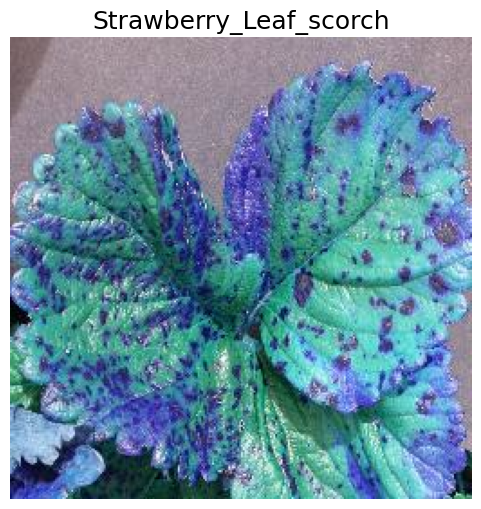

In [7]:
image = cv2.imread("/content/plantvillage dataset/color/Strawberry___Leaf_scorch/0024203d-6e4c-490f-b9a8-e5926df0b76e___RS_L.Scorch 0795.JPG")
plt.figure(figsize = (6,6))
plt.imshow(image)
plt.title('Strawberry_Leaf_scorch',size =18 )
plt.axis('off')
plt.show()

In [8]:
model = keras.Sequential([
    keras.layers.Rescaling(scale = 1/255 , input_shape =(224,224,3) ) ,

    keras.layers.Conv2D(32 , (3,3) , activation = 'relu'),
    keras.layers.MaxPool2D((2,2))                     ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,
    keras.layers.Dropout(0.2),
     keras.layers.Conv2D(128 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,

    # fully connected layers

    keras.layers.Flatten(),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dense(38,activation ='sigmoid')

])

In [9]:
model.compile(
    optimizer = 'adam' ,
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
)


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                   

In [11]:
history = model.fit(train_ds , epochs = 20)

Epoch 1/20
1358/1358 [==============================] - 121s 83ms/step - loss: 1.6724 - accuracy: 0.5270
Epoch 2/20
1358/1358 [==============================] - 111s 81ms/step - loss: 0.6583 - accuracy: 0.7937
Epoch 3/20
1358/1358 [==============================] - 110s 81ms/step - loss: 0.4064 - accuracy: 0.8699
Epoch 4/20
1358/1358 [==============================] - 110s 80ms/step - loss: 0.3028 - accuracy: 0.9006
Epoch 5/20
1358/1358 [==============================] - 108s 80ms/step - loss: 0.2451 - accuracy: 0.9181
Epoch 6/20
1358/1358 [==============================] - 108s 79ms/step - loss: 0.2044 - accuracy: 0.9330
Epoch 7/20
1358/1358 [==============================] - 108s 79ms/step - loss: 0.1810 - accuracy: 0.9399
Epoch 8/20
1358/1358 [==============================] - 107s 79ms/step - loss: 0.1552 - accuracy: 0.9485
Epoch 9/20
1358/1358 [==============================] - 107s 78ms/step - loss: 0.1428 - accuracy: 0.9536
Epoch 10/20
1358/1358 [==============================] 

In [12]:
model.evaluate(test_ds)


340/340 [==============================] - 12s 36ms/step - loss: 0.4689 - accuracy: 0.8810


[0.46889740228652954, 0.8810422420501709]

In [13]:
def img_to_pred(image):
  image = image.numpy()
  image = tf.expand_dims(image,0)
  return image

1/1 [==============================] - 0s 25ms/step


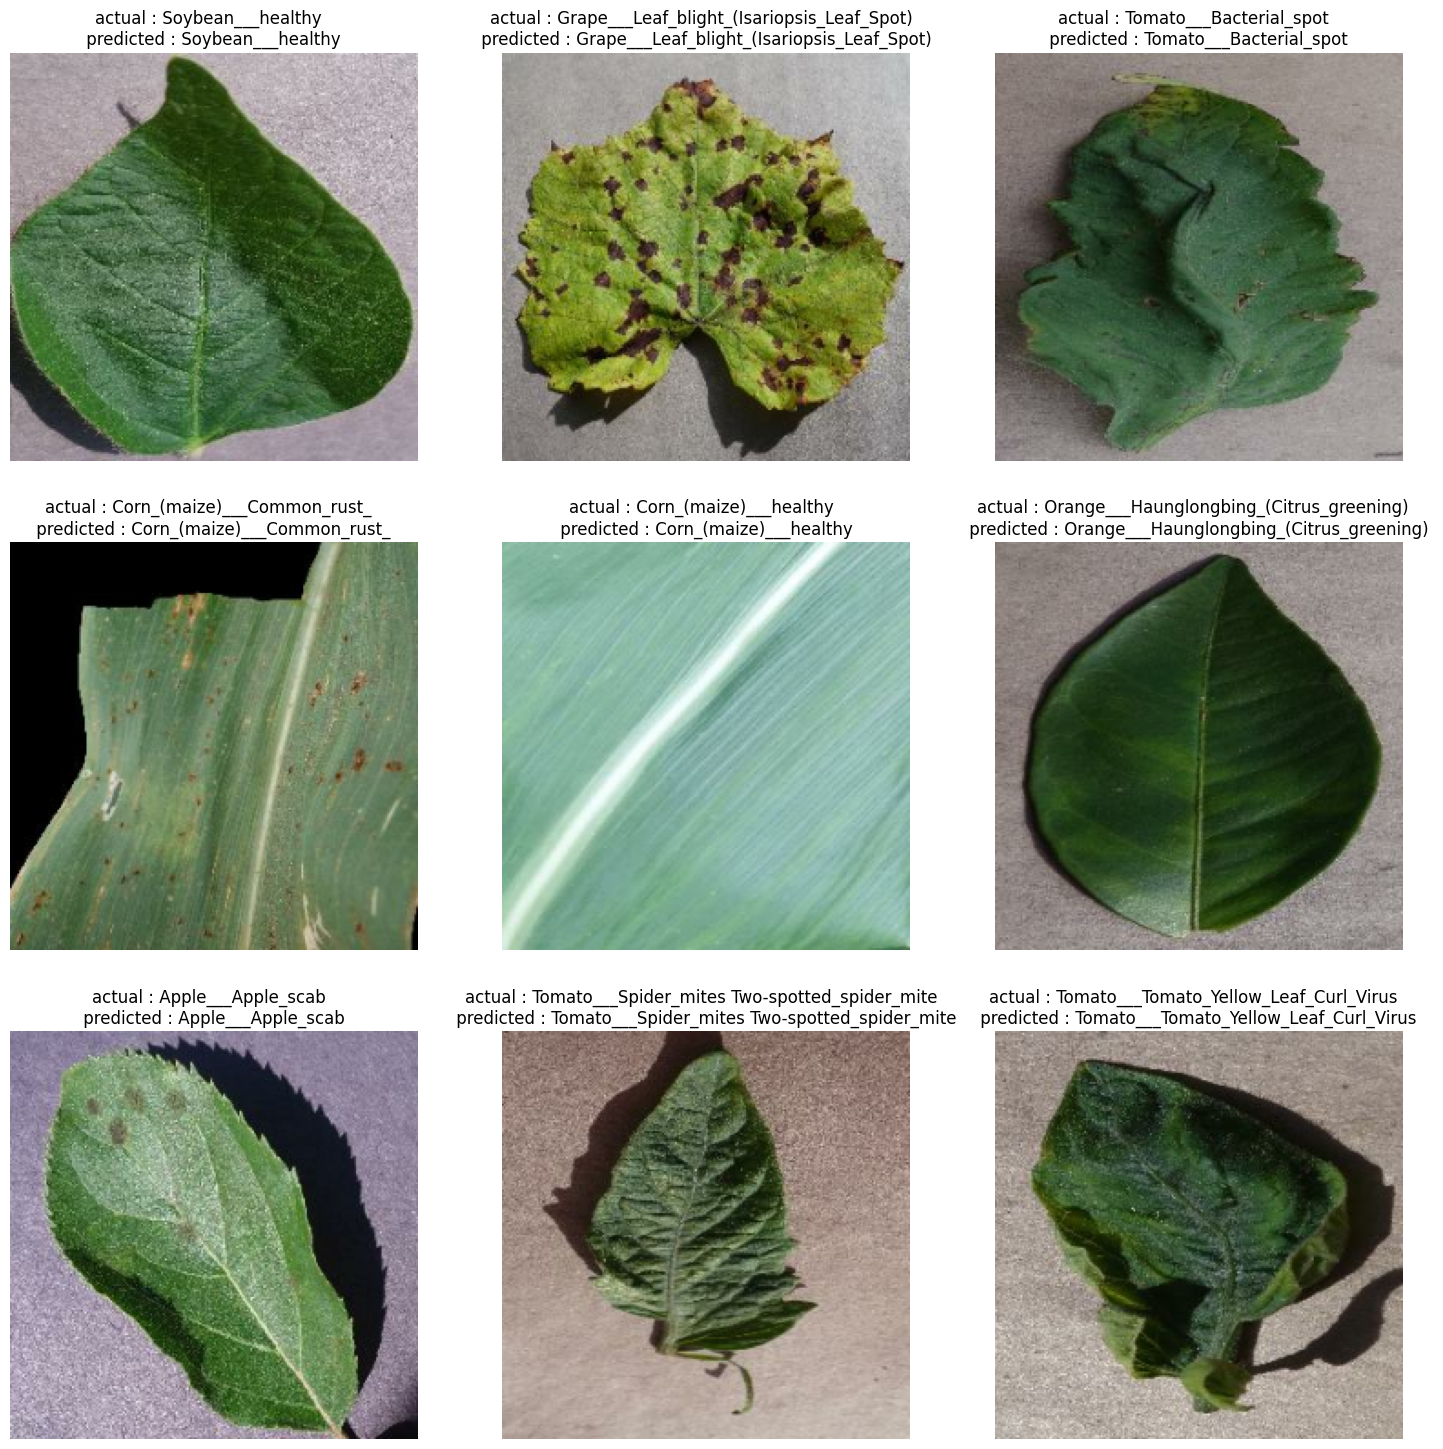

In [14]:
plt.figure(figsize=(18,18))
for images, labels in test_ds.take(1) : # take the first patch
  for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(images[i].numpy().astype('uint32'))
    plt.axis('off')
    actual = classes[labels[i]]
    predict =classes[np.argmax( model.predict(img_to_pred(images[i])))]
    plt.title(f"actual : {actual}  \n predicted : {predict} ")